# Experiment 1 Data

In [2]:
import json; import re; import ast; import pandas as pd; from datetime import datetime; import time; import hypertools as hyp
import numpy as np; from matplotlib import pyplot as plt; import os; from matplotlib import patches as patches; import seaborn as sb
import warnings; import scipy; import pickle; import statsmodels.api as sm; import statsmodels.formula.api as smf
from statsmodels.formula.api import ols; import pingouin; from itertools import combinations
from analysis_helpers import *; import mord
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext rpy2.ipython

# Horizontal gaze shift towards image

In [9]:
with open("/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/subs.p",'rb') as fp:
    subs = pickle.load(fp)

In [12]:
subs_df = pd.concat(subs)
subs_df[subs_df['Trial Type']=='Memory'].head()
#subs_df[['Cued Category','Trial','Run','Subject']]

,Attention Button,Attention Level,Attention Probe,Attention Reaction Time (s),Category,Cue Validity,Cued Category,Cued Composite,Cued Face,Cued Place,...,av_x_coord,av_y_coord,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye
80,NaN,None,NaN,NaN,Place,NaN,Face,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Novel,NaN,NaN,Face,NaN,Face,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Novel,NaN,NaN,Face,NaN,Face,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,Novel,NaN,NaN,Face,NaN,Face,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,None,NaN,NaN,Place,NaN,Face,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
subs_df['scaled_x_coord'] = (subs_df['av_x_coord']- (59.8/2.0))/(59.8/2.0)
min(subs_df['scaled_x_coord'])

-0.7098527832031251

In [14]:
subs_df.loc[subs_df['Cued Side']=='<','scaled_x_coord'] = abs(subs_df[subs_df['Cued Side']=='<']['scaled_x_coord'])
subs_df.loc[subs_df['Attention Level']=='Category','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='Category']['scaled_x_coord']
subs_df.loc[subs_df['Attention Level']=='None','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='None']['scaled_x_coord']

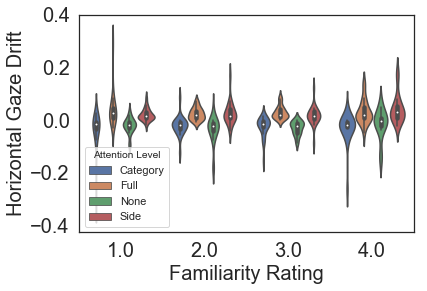

In [15]:
sb.set_style('white')

f = sb.violinplot(x='Familiarity Rating', y='scaled_x_coord', 
              hue='Attention Level', 
              data=subs_df[subs_df['Attention Level']!='Novel'].groupby(['Subject','Familiarity Rating','Attention Level'],
                                  as_index=False).mean())

plt.grid(False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Familiarity Rating',    fontsize = 20)
plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
#f.set(ylim=(-1, 1))
plt.savefig('av_x_gaze.pdf')

# Add gaze ANOVA and regression, here

# ~~~~~ Extras ~~~~~ 

In [9]:
with open("/Users/kirstenziman/Documents/github/attention-memory-task/figures/behavioral_data.pkl",'rb') as fp:
    df_list = pickle.load(fp)
    
av_x = pd.DataFrame.from_csv('av_x_and_sub_info.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kirstenziman/Documents/github/attention-memory-task/figures/behavioral_data.pkl'

In [3]:
av_x['Subject'].unique()

NameError: name 'av_x' is not defined

In [4]:
sub_list = list(df_list['Subject'].unique())

NameError: name 'df_list' is not defined

In [5]:
sub_list.sort()
sub_list

NameError: name 'sub_list' is not defined

In [6]:
av_x['Subject'].unique()

NameError: name 'av_x' is not defined

# Full Violin and ROC

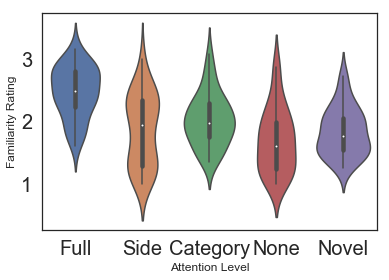

In [49]:
sb.violinplot(x='Attention Level', y='Familiarity Rating', 
              data = df_list.groupby(['Subject','Attention Level'],as_index=False).mean(),
             order = ['Full','Side','Category','None','Novel'])

# insert ttest bars and test

# insert pingouin


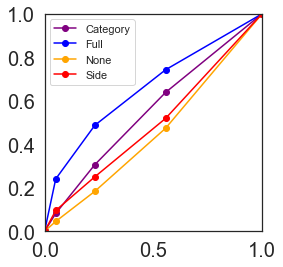

Full AUC: 0.6583234520612545
Category AUC: 0.5541807431190772
Side AUC: 0.4957221974044736
None AUC: 0.4556036487415198


In [50]:
ROC_full = ROC_data(df_list)[0]
ROC_plot(ROC_full)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_full['Novel'], ROC_full[attn])))

# Category Violin and ROC

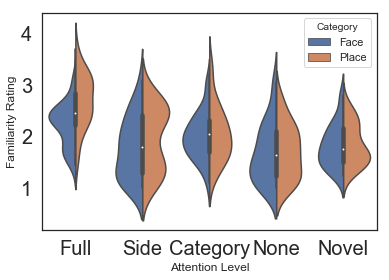

In [51]:
sb.violinplot(x='Attention Level', y='Familiarity Rating', 
              data = df_list.groupby(['Subject','Attention Level','Category'],as_index=False).mean(),
             order = ['Full','Side','Category','None','Novel'],
             hue='Category', split=True)

# insert ttest bars and test

# insert pingouin


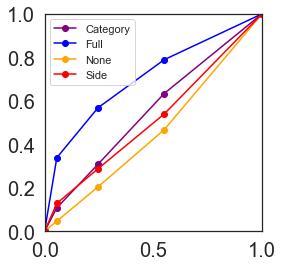

Full AUC: 0.7076886882677518
Category AUC: 0.5556073162269521
Side AUC: 0.5165876106637028
None AUC: 0.45826751214860395


In [52]:
ROC_place = ROC_data(df_list)[2]
ROC_plot(ROC_place)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_full['Novel'], ROC_place[attn])))

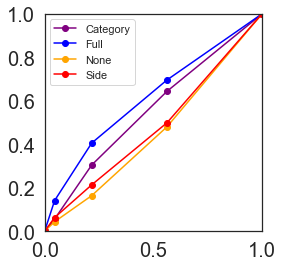

Full AUC: 0.7109666917323914
Category AUC: 0.5579367245366295
Side AUC: 0.5179750501813573
None AUC: 0.45924471406587736


In [53]:
ROC_face = ROC_data(df_list)[1]
ROC_plot(ROC_face)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_face['Novel'], ROC_place[attn])))

# Task Efficacy

# Novel Cued and Uncued Category

In [54]:
# insert here


# Reaction Time (Attn Probe)

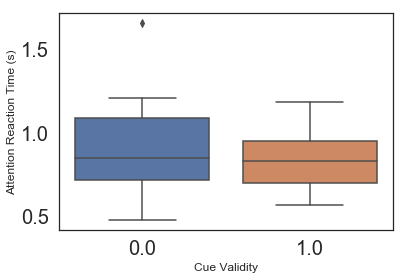

In [55]:
sb.boxplot(x = 'Cue Validity', y = 'Attention Reaction Time (s)', 
              data = df_list.groupby(['Subject','Cue Validity'], as_index=False).mean() )

# add significance markers

# Gaze Check

# Gaze Plot

In [56]:
# eye_data = eye_read('/Users/kirstenziman/Documents/attention-memory-task/data/','eye_data_exp1.pkl')

In [57]:
with open('eye_data_exp1.pkl','rb') as fp:
    eye_data_exp1 = pickle.load(fp)
    
eye_data_exp1 = eye_data_exp1[eye_data_exp1['av_x_coord']<59.8]
eye_data_exp1['Subject'] = eye_data_exp1['Subject'].map(lambda x: x.replace('_',''))

In [58]:
len(list(df_list['Subject'].unique()))

30

In [59]:
tr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*8*30
df_list['Trial']=np.nan
df_list.loc[df_list['Trial Type']=='Presentation','Trial']=tr
df_list.head()

,Unnamed: 0,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
0,150,10,Presentation,3,00926960627Fa_sunapqwoeotxshkukbh.jpg,00076931230fa_sunaafewhewbxmjiurz.jpg,00926960627Fa.jpg,sunapqwoeotxshkukbh.jpg,00076931230fa.jpg,sunaafewhewbxmjiurz.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,0.0
1,151,10,Presentation,3,00725941201fa_sunaefgzwiramypjvtd.jpg,00828940307fa_sunahuynahneraqftyz.jpg,00725941201fa.jpg,sunaefgzwiramypjvtd.jpg,00828940307fa.jpg,sunahuynahneraqftyz.jpg,...,NaN,0.0,NaN,NaN,3.0,NaN,1.538592e+09,1.538592e+09,o,1.0
2,152,10,Presentation,3,00089931230fa_sunaagcpoejbuzyvddd.jpg,00730960620fa_sunaekgzpfilgjxpeyq.jpg,00089931230fa.jpg,sunaagcpoejbuzyvddd.jpg,00730960620fa.jpg,sunaekgzpfilgjxpeyq.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,2.0
3,153,10,Presentation,3,00978960627fa_sunbddbivbptlrlauhy.jpg,00265940128fb_sunabkmdplkdbvxriff.jpg,00978960627fa.jpg,sunbddbivbptlrlauhy.jpg,00265940128fb.jpg,sunabkmdplkdbvxriff.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.538592e+09,1.538592e+09,o,3.0
4,154,10,Presentation,3,00937960627fa_sunaqsolmfydodnakub.jpg,00788941205fa_sunagountlxpzkytsmp.jpg,00937960627fa.jpg,sunaqsolmfydodnakub.jpg,00788941205fa.jpg,sunagountlxpzkytsmp.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,4.0


In [60]:
grouped_eye = eye_data_exp1.groupby(['Subject','Run','Trial'], as_index=False).mean()

grouped_eye['Subject'] = pd.to_numeric(grouped_eye['Subject'])
grouped_eye['Run']     = pd.to_numeric(grouped_eye['Run'])
grouped_eye['Trial']   = pd.to_numeric(grouped_eye['Trial'])


merged_pres = grouped_eye.merge(df_list, on=['Subject', 'Run', 'Trial'])

In [61]:
# merged_pres

In [62]:
def add_gaze(df):
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [63]:
# merged_pres[merged_pres['Trial Type']=='Presentation']

combine = pd.concat([merged_pres, df_list[df_list['Trial Type']=='Memory']])

In [64]:
# subs = []

# for sub in combine['Subject'].unique():
#     print(sub)
#     subs.append(add_gaze(combine[combine['Subject']==sub]))

In [3]:
# pickle.dump(subs, open("subs.p", "wb" ))

with open("/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/subs.p",'rb') as fp:
    subs = pickle.load(fp)

In [4]:
subs_df = pd.concat(subs)

In [5]:
subs_df = pd.concat(subs)
subs_df[subs_df['Trial Type']=='Memory'].head()
subs_df[['Cued Category','Trial','Run','Subject']]

,Cued Category,Trial,Run,Subject
0,Face,0.0,1,0
1,Face,1.0,1,0
2,Face,2.0,1,0
3,Face,3.0,1,0
4,Face,4.0,1,0
5,Face,5.0,1,0
6,Face,6.0,1,0
7,Face,7.0,1,0
8,Face,8.0,1,0
9,Face,9.0,1,0


# Gaze ANOVA

In [6]:
subs_df['scaled_x_coord'] = (subs_df['av_x_coord']- (59.8/2.0))/(59.8/2.0)
min(subs_df['scaled_x_coord'])

-0.7098527832031251

In [7]:
subs_df.loc[subs_df['Cued Side']=='<','scaled_x_coord'] = abs(subs_df[subs_df['Cued Side']=='<']['scaled_x_coord'])
subs_df.loc[subs_df['Attention Level']=='Category','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='Category']['scaled_x_coord']
subs_df.loc[subs_df['Attention Level']=='None','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='None']['scaled_x_coord']

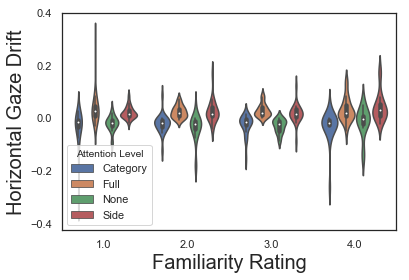

In [8]:
sb.set_style('white')

f = sb.violinplot(x='Familiarity Rating', y='scaled_x_coord', 
              hue='Attention Level', 
              data=subs_df[subs_df['Attention Level']!='Novel'].groupby(['Subject','Familiarity Rating','Attention Level'],
                                  as_index=False).mean())

plt.grid(False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Familiarity Rating',    fontsize = 20)
plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
#f.set(ylim=(-1, 1))
plt.savefig('av_x_gaze.pdf')



# Gaze Regression

In [16]:
subs_df['Subject'].unique()


array([ 0, 10, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24, 25,
       26, 27, 32, 33, 34,  7,  8, 31,  6, 36, 30,  9, 11])

In [17]:
subs_df['FamiliarityRating'] = subs_df['Familiarity Rating']

d=[]
for subject in subs_df['Subject'].unique(): 
    
    sub=[]
    data = subs_df[subs_df['Subject']==subject]
    reg = smf.ols(formula = "FamiliarityRating ~ scaled_x_coord", data = data).fit()
    d.append(pd.concat([data, pd.DataFrame({'gaze_resid':reg.resid})], axis=1, sort=False))
    
gaze_reg = pd.concat(d)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

# +/- 1 Gaze Limited

In [18]:
# start with eye_data_exp1
# find subs, run, trials where no gaze outside 1 right or left

# pull these from subs_df

In [19]:
# eye_data_exp1['Subject']

### Load Gaze Data

# Gaze ANOVA

In [20]:
#eye_data = eye_read('/Users/kirstenziman/Documents/attention-memory-task/data/','eye_data_exp1.pkl')

In [21]:
#eye_data = eye_data[eye_data['av_x_coord']<=59.8]

In [22]:
#eye_data[eye_data['av_x_coord']>]

In [23]:
# gaze_dat = pd.DataFrame.from_csv('gaze_reg_exp1_no_novel_subtraction.csv')

In [24]:
# sb.violinplot(x='Familiarity Rating', y='')

# Gaze Regression

In [25]:
gaze = pd.DataFrame.from_csv('av_x_and_sub_info.csv')

FileNotFoundError: File b'av_x_and_sub_info.csv' does not exist

In [26]:
def add_gaze(df):
    
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''
    
    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [27]:
full = pd.DataFrame.from_csv('full_score_gaze_and_novel.csv')

FileNotFoundError: File b'full_score_gaze_and_novel.csv' does not exist

In [28]:
full[full['Subject']==32]['av_x_coord'].mean()

NameError: name 'full' is not defined

In [29]:
full.loc[full['Subject'] == 0, 'av_x_coord'] = (59.8/2048) * full.loc[full['Subject'] == 0]['av_x_coord']

# df['av_x_coord'] = (59.8/2048)*(df[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
# df['av_y_coord'] = (33.6/1152)*(df[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

NameError: name 'full' is not defined

In [30]:
full[full['Subject']==0]['av_x_coord'].mean()

NameError: name 'full' is not defined

In [98]:
# full[full['Subject']==0]['av_x_coord']